# Guided Project: Finding the Best Markets to Advertise In

## The Goal

An e-learning company that offers courses on programming. Most of its courses are on web and mobile development, but they also cover many other domains, like data science, game development, etc. They want to promote their product and they'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise their product in.

## Understanding the Data

To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository. Below, we'll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of the repository we just mentioned.

In [1]:
import pandas as pd
d = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [3]:
d.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
for i in d.columns:
    print(i, ' : ', d[i].dtype)

Age  :  float64
AttendedBootcamp  :  float64
BootcampFinish  :  float64
BootcampLoanYesNo  :  float64
BootcampName  :  object
BootcampRecommend  :  float64
ChildrenNumber  :  float64
CityPopulation  :  object
CodeEventConferences  :  float64
CodeEventDjangoGirls  :  float64
CodeEventFCC  :  float64
CodeEventGameJam  :  float64
CodeEventGirlDev  :  float64
CodeEventHackathons  :  float64
CodeEventMeetup  :  float64
CodeEventNodeSchool  :  float64
CodeEventNone  :  float64
CodeEventOther  :  object
CodeEventRailsBridge  :  float64
CodeEventRailsGirls  :  float64
CodeEventStartUpWknd  :  float64
CodeEventWkdBootcamps  :  float64
CodeEventWomenCode  :  float64
CodeEventWorkshops  :  float64
CommuteTime  :  object
CountryCitizen  :  object
CountryLive  :  object
EmploymentField  :  object
EmploymentFieldOther  :  object
EmploymentStatus  :  object
EmploymentStatusOther  :  object
ExpectedEarning  :  float64
FinanciallySupporting  :  float64
FirstDevJob  :  float64
Gender  :  object
GenderOt

## Checking for Sample Representativity

As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What locations have the greatest densities of new coders.
* How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [5]:
job = d.JobRoleInterest.value_counts(normalize = True, dropna = False)
length= int(job.describe()[0])
for i in range(length):
    print(job.index[i], ' : ', round(job.iloc[i]*100,2))


nan  :  61.53
Full-Stack Web Developer  :  4.53
  Front-End Web Developer  :  2.48
  Data Scientist  :  0.84
Back-End Web Developer  :  0.78
  Mobile Developer  :  0.64
Game Developer  :  0.63
Information Security  :  0.51
Full-Stack Web Developer,   Front-End Web Developer  :  0.35
  Front-End Web Developer, Full-Stack Web Developer  :  0.31
  Product Manager  :  0.3
Data Engineer  :  0.29
  User Experience Designer  :  0.29
  User Experience Designer,   Front-End Web Developer  :  0.24
  Front-End Web Developer, Back-End Web Developer, Full-Stack Web Developer  :  0.21
  DevOps / SysAdmin  :  0.2
Back-End Web Developer, Full-Stack Web Developer,   Front-End Web Developer  :  0.2
Back-End Web Developer,   Front-End Web Developer, Full-Stack Web Developer  :  0.2
Full-Stack Web Developer,   Front-End Web Developer, Back-End Web Developer  :  0.17
  Front-End Web Developer, Full-Stack Web Developer, Back-End Web Developer  :  0.17
Full-Stack Web Developer,   Mobile Developer  :  0.16
  

In [6]:
job_role_split = d.JobRoleInterest.str.split(',')

In [7]:
import numpy as np
job_role_split = job_role_split.dropna()
job_choice_1 = job_role_split.apply(lambda y: y[0])
job_choice_2 = job_role_split.apply(lambda y: y[1] if len(y)>1 else 'NaN')
job_choice_3 = job_role_split.apply(lambda y: y[2] if len(y)>2 else 'NaN')
job_choice_4 = job_role_split.apply(lambda y: y[3] if len(y)>3 else 'NaN')
job_choice_5 = job_role_split.apply(lambda y: y[4] if len(y)>4 else 'NaN')
job_choice_6 = job_role_split.apply(lambda y: y[5] if len(y)>5 else 'NaN')
job_choice_7 = job_role_split.apply(lambda y: y[6] if len(y)>6 else 'NaN')
job_choice_8 = job_role_split.apply(lambda y: y[7] if len(y)>7 else 'NaN')
job_choice_9 = job_role_split.apply(lambda y: y[8] if len(y)>8 else 'NaN')

job_choices = pd.DataFrame()
for i in range(6):
    job_choices['job_choice_{}'.format(i+1)]=(
        job_role_split.apply(lambda y: y[i] if len(y)>i else np.nan))

In [8]:
top10_choices_counts = []
for i in job_choices:
    top10_choices_counts.append(job_choices[i].value_counts(normalize = True)[:10]*100)

In [9]:
top10_choices_counts

[Full-Stack Web Developer      24.427918
   Front-End Web Developer     17.820366
 Back-End Web Developer        11.084096
   Mobile Developer             8.152174
   Data Scientist               7.479977
 Game Developer                 6.664760
   User Experience Designer     5.592105
 Information Security           4.862700
 Data Engineer                  4.347826
   DevOps / SysAdmin            3.318078
 Name: job_choice_1, dtype: float64,  Full-Stack Web Developer      17.493199
    Front-End Web Developer     16.760829
  Back-End Web Developer        12.575853
    Mobile Developer            10.755388
  Game Developer                 7.742205
    Data Scientist               6.884285
    User Experience Designer     6.675037
  Information Security           5.796192
  Data Engineer                  5.252145
    Product Manager              3.933877
 Name: job_choice_2, dtype: float64,  Full-Stack Web Developer      18.018915
    Front-End Web Developer     15.306122
  Back-End Web

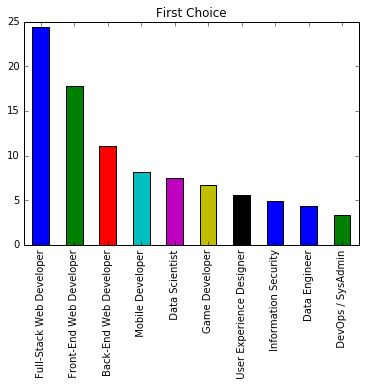

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
top10_choices_counts[0].plot(kind = 'bar', title = 'First Choice')

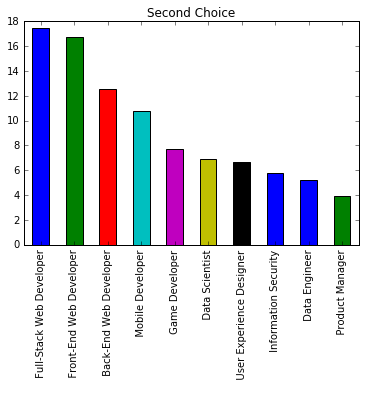

In [11]:
top10_choices_counts[1].plot(kind = 'bar', title = 'Second Choice')

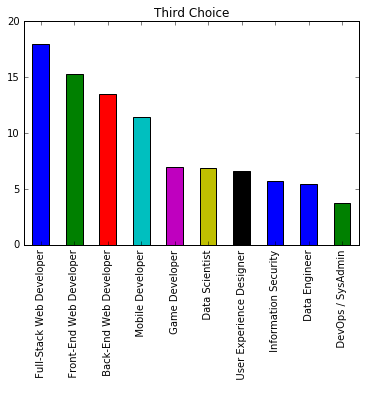

In [12]:
top10_choices_counts[2].plot(kind = 'bar', title = 'Third Choice')

It turns out that most people in this survey are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

Where are these new coders located.
What are the locations with the greatest number of new coders.
How much money new coders are willing to spend on learning.

## New Coders - Locations and Densities

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [13]:
# create a new dataframe 'd1' where all the rows with null for 
# the 'JobRoleInterest' variable are deleted
d1 = d.dropna(axis = 0, subset = ['JobRoleInterest']).copy()

In [14]:
d1['CountryLive'].value_counts(dropna = True)

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Croatia     

In [15]:
d1['CountryLive'].value_counts(dropna = True, normalize = True)

United States of America         0.457005
India                            0.077216
United Kingdom                   0.046066
Canada                           0.038023
Poland                           0.019158
Brazil                           0.018865
Germany                          0.018280
Australia                        0.016379
Russia                           0.014917
Ukraine                          0.013016
Nigeria                          0.012284
Spain                            0.011261
France                           0.010968
Romania                          0.010383
Netherlands (Holland, Europe)    0.009506
Italy                            0.009067
Serbia                           0.007605
Philippines                      0.007605
Greece                           0.006727
Ireland                          0.006288
South Africa                     0.005703
Mexico                           0.005411
Turkey                           0.005265
Singapore                        0

45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.



## Spending Money for Learning


The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of \$59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

* These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the MoneyForLearning column to the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [16]:
d1['MonthsProgramming']=(
    d1['MonthsProgramming'].apply(lambda y: 1 if y==0 else y)
    )


In [17]:
d1['MonthlyPay'] = d1['MoneyForLearning']/d1['MonthsProgramming']

In [18]:
d1['MonthlyPay'].head()

1     13.333333
2    200.000000
3      0.000000
4      0.000000
6      0.000000
Name: MonthlyPay, dtype: float64

In [19]:
# Check how many null values do we have in the newly created
# MonthlyPay column
pd.isnull(d1['MonthlyPay']).value_counts()

False    6317
True      675
Name: MonthlyPay, dtype: int64

In [20]:
# Remove rows with null values in MonthlyPay and CountryLive cols
d2 = d1.dropna(axis = 0, subset=['MonthlyPay', 'CountryLive']).copy()


In [21]:
target = d2[(d2['CountryLive']=='United States of America') |
           (d2['CountryLive']=='India') |
           (d2['CountryLive']=='Canada') |
           (d2['CountryLive']=='United Kingdom')][['CountryLive', 'MonthlyPay']]
target['CountryLive'].value_counts()
# group_pay = d2[].groupby('CountryLive')

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [22]:
# MEAN MONTHLY PAYMENTS PER COUNTRY
target.groupby('CountryLive').mean().sort_values('MonthlyPay', ascending = False)


,MonthlyPay
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


In [23]:
# MEDIAN MONTHLY PAYMENTS PER COUNTRY
target.groupby('CountryLive').median().sort_values('MonthlyPay', ascending = False)


,MonthlyPay
CountryLive,
United States of America,3.333333
Canada,0.000000
India,0.000000
United Kingdom,0.000000


In [24]:
# MODE OF MONTHLY PAYMENTS PER COUNTRY
target.groupby('CountryLive').MonthlyPay.apply(lambda x:x.mode())


CountryLive                
Canada                    0    0.0
India                     0    0.0
United Kingdom            0    0.0
United States of America  0    0.0
Name: MonthlyPay, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

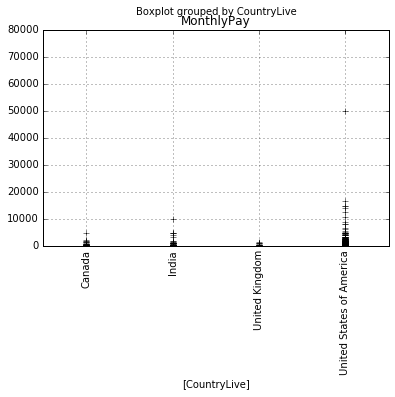

In [25]:
#avg_mean = target.groupby('CountryLive').mean().sort_values('MonthlyPay', ascending = False)

target.boxplot(by='CountryLive', rot = 90)




/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


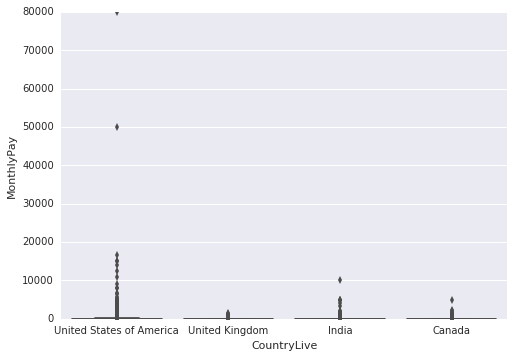

In [26]:
import seaborn as sns
sns.boxplot(x =target.CountryLive, y=target.MonthlyPay)

In [27]:
target

,CountryLive,MonthlyPay
1,United States of America,13.333333
2,United States of America,200.000000
6,United Kingdom,0.000000
15,United States of America,0.000000
16,United States of America,16.666667
18,United States of America,35.714286
19,United States of America,17.857143
21,United States of America,100.000000
22,United Kingdom,285.714286
23,United States of America,100.000000


Exploring outliers in the USA. Check all monthly payments larger than 10000 and see if all of them participated in bootcamps

In [28]:
d2[(d2['MonthlyPay']>10000) & 
       (d2['CountryLive']== 'United States of America')]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyPay
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,80000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000
17231,50.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000


In [29]:
d3 = d2.drop(d2[(d2['MonthlyPay']>10000) & 
       (d2['CountryLive']== 'United States of America')&
        (d2['AttendedBootcamp']==0)].index)

In [30]:
d2.shape

(6212, 137)

In [31]:
d3.shape

(6206, 137)

So we deleted 6 rows of US residets with monthly payments exceeding 10000 and no bootcamp attended.

Let's now check the outliers in India.

In [32]:
d2[(d2['MonthlyPay']>2000) & 
       (d2['CountryLive']== 'India')]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyPay
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems none of the residents of India with monthly payments above 2000 attended a bootcamp. So we'll eliminate these rows.

In [33]:
d3.drop(d3[(d3['MonthlyPay']>2000) & 
       (d3['CountryLive']== 'India')].index, inplace = True)

In [34]:
d3.shape

(6200, 137)

Thus far we have elimitate outliers from the US and India. Let's see how that affected our distripution.

In [35]:
target_clean = d3[(d3['CountryLive']=='United States of America') |
           (d3['CountryLive']=='India') |
           (d3['CountryLive']=='Canada') |
           (d3['CountryLive']=='United Kingdom')][['CountryLive', 'MonthlyPay']]
target_clean['CountryLive'].value_counts()

United States of America    2927
India                        457
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [36]:
# MEAN MONTHLY PAYMENTS PER COUNTRY before eliminating outliers
target.groupby('CountryLive').mean().sort_values('MonthlyPay', ascending = False)


,MonthlyPay
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


In [37]:
# MEAN MONTHLY PAYMENTS PER COUNTRY - outliers deleted
target_clean.groupby('CountryLive').mean().sort_values('MonthlyPay', ascending = False)


,MonthlyPay
CountryLive,
United States of America,177.560001
Canada,113.510961
India,65.758763
United Kingdom,45.534443


Let's now zoom into the distribution for Canada

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


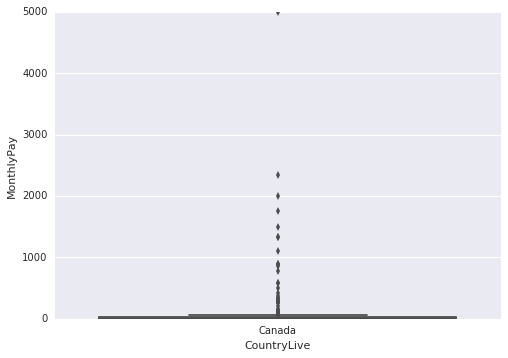

In [38]:
sns.boxplot(x = 'CountryLive', y='MonthlyPay', 
            data = target_clean[target_clean['CountryLive']=='Canada'])

Canada has a single outlier. Lets check it out.

In [39]:
d3[(d3['CountryLive']=='Canada') & (d3['MonthlyPay']>3000)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyPay
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [40]:
d3.shape

(6200, 137)

The person paid 5000 and attended a bootcamp. Let's check the distribution without this record. Let's also remove the huge US outlier that paid 50000 per month. Even though both records suggest that a bootcamp was paid for we need to get a picture of the market without such exceptions.

In [41]:
d3 =d3[d3['MonthlyPay']<14000]

In [42]:
d3.shape

(6194, 137)

In [43]:
d3.drop(d3[(d3['MonthlyPay']>4000)&
       (d3['CountryLive']=='Canada')].index, inplace=True)

In [44]:
d3.shape

(6193, 137)

In [45]:
t_clean2 = d3[d3['CountryLive'].str.contains(
        'United States of America|Canada|India|United Kingdom')][['CountryLive',
                                                       'MonthlyPay']]

In [46]:
t_clean2.shape

(3900, 2)

In [47]:
target.shape

(3915, 2)

In [48]:
target_clean.shape

(3903, 2)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


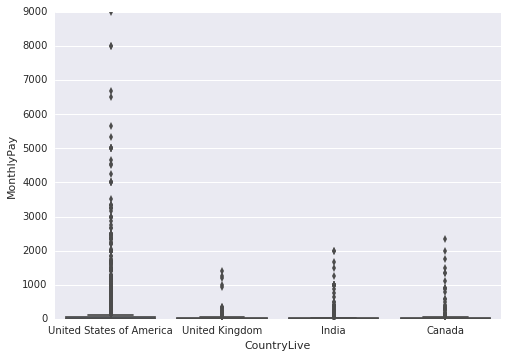

In [49]:
sns.boxplot(x = 'CountryLive', y='MonthlyPay',
           data=t_clean2)

In [50]:
t_clean2.groupby(by= 'CountryLive').mean().sort_values('MonthlyPay',
                                                       ascending=False)

,MonthlyPay
CountryLive,
United States of America,155.459187
Canada,93.065400
India,65.758763
United Kingdom,45.534443


## Choosing the Two Best Markets¶

In [52]:
t_clean2.groupby(by= 'CountryLive').count().sort_values('MonthlyPay',
                                                       ascending=False)

,MonthlyPay
CountryLive,
United States of America,2925
India,457
United Kingdom,279
Canada,239


Above we see the number of customers in each market. The US is clearly the best market to advertise.


Let's now check how these numbers are distributed in terms of Monthly expenses for the other three countries.

In [55]:
india = t_clean2[t_clean2['CountryLive']=='India']['MonthlyPay']

In [58]:
india.value_counts(bins = 10).sort_index()

(-2.001, 200.0]     428
(200.0, 400.0]       10
(400.0, 600.0]        3
(600.0, 800.0]        2
(800.0, 1000.0]       9
(1000.0, 1200.0]      0
(1200.0, 1400.0]      1
(1400.0, 1600.0]      1
(1600.0, 1800.0]      1
(1800.0, 2000.0]      2
Name: MonthlyPay, dtype: int64

In [61]:
india_bin1 = india[india<200]

In [62]:
india_bin1.value_counts(bins = 10).sort_index()

(-0.196, 19.5]    358
(19.5, 39.0]       16
(39.0, 58.5]       14
(58.5, 78.0]        7
(78.0, 97.5]        4
(97.5, 117.0]       8
(117.0, 136.5]      6
(136.5, 156.0]      3
(156.0, 175.5]      8
(175.5, 195.0]      2
Name: MonthlyPay, dtype: int64

In [63]:
india_bin1_1 = india_bin1[india_bin1<19.5]

In [64]:
india_bin1_1.value_counts(bins = 10).sort_index()

(-0.0198, 1.875]    276
(1.875, 3.75]        18
(3.75, 5.625]        22
(5.625, 7.5]          6
(7.5, 9.375]          6
(9.375, 11.25]       10
(11.25, 13.125]       9
(13.125, 15.0]        3
(15.0, 16.875]        7
(16.875, 18.75]       1
Name: MonthlyPay, dtype: int64

Above we found that for the Indian segment out of 428 customers - 276 paid less than 1.88 and 358 customers - less than 19.5. With out target of selling subscription services for 59 per month India doesn't seem a good market.

Let's now check out Canada

In [65]:
canada = t_clean2[t_clean2['CountryLive'] == 'Canada']

In [68]:
canada['MonthlyPay'].value_counts(bins= 10)

(-2.338, 233.717]       216
(233.717, 467.433]        9
(701.15, 934.867]         4
(467.433, 701.15]         3
(1168.583, 1402.3]        2
(2103.45, 2337.167]       1
(1869.733, 2103.45]       1
(1636.017, 1869.733]      1
(1402.3, 1636.017]        1
(934.867, 1168.583]       1
Name: MonthlyPay, dtype: int64

In [69]:
canada_bin1 = canada[canada['MonthlyPay']<233]['MonthlyPay']

In [71]:
canada_bin1.value_counts(bins=10)

(-0.209, 20.833]      176
(20.833, 41.667]       19
(41.667, 62.5]          7
(62.5, 83.333]          6
(145.833, 166.667]      2
(125.0, 145.833]        2
(104.167, 125.0]        2
(187.5, 208.333]        1
(83.333, 104.167]       1
(166.667, 187.5]        0
Name: MonthlyPay, dtype: int64

For the Canada market as well we find that majority of customers spend less than 20 per month - far from our tarket of 59.

For the UK we saw that the average for the whole market is less than our target and with the smallest customer bas it does not look promising.

In [72]:
It seems that the best strategy is to concentrate our advertising budget for the US market.

SyntaxError: invalid syntax (<ipython-input-72-2e06ebc719fd>, line 1)